In [452]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




#reading the data from the file
df = pd.read_csv('survey lung cancer.csv')

## Preprocessing

In [374]:
# Display the first 5 rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [376]:
#here we can check the data set for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [378]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [380]:
# Gender encoding
le = LabelEncoder()
le.fit(df.GENDER.drop_duplicates())
# Ensure the order is False/No first, then True/Yes
le.classes_ = np.array(['F', 'M'])  # Adjust based on your actual categories
df.GENDER = le.transform(df.GENDER) + 1  # Adding 1 to get 1 and 2

# Lung cancer encoding
le = LabelEncoder()
le.fit(df.LUNG_CANCER.drop_duplicates())
# Ensure the order is False/No first, then True/Yes
le.classes_ = np.array(['NO', 'YES'])  # Adjust based on your actual categories
df.LUNG_CANCER = le.transform(df.LUNG_CANCER) + 1  # Adding 1 to get 1 and 2

In [382]:
#here we can run data.head again to look at the altered set, now we can see all the features are encoded to be numerical.
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


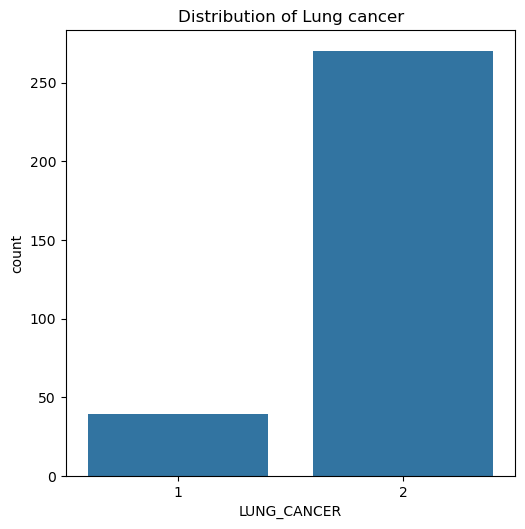

In [384]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
sns.countplot(x = df["LUNG_CANCER"], data=df)
plt.title(f'Distribution of Lung cancer')
plt.tight_layout()
plt.show()

In [386]:
df_no = df[df['LUNG_CANCER'] == 1]
df_yes = df[df['LUNG_CANCER'] == 2]
df_yes_downsampled = df_yes.sample(n=len(df_no), random_state=42)
df_d = pd.concat([df_no, df_yes_downsampled])

In [388]:
df_d.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
8,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,1
12,1,60,2,1,1,1,1,2,1,1,1,1,2,1,1,1


## Correlation analysis

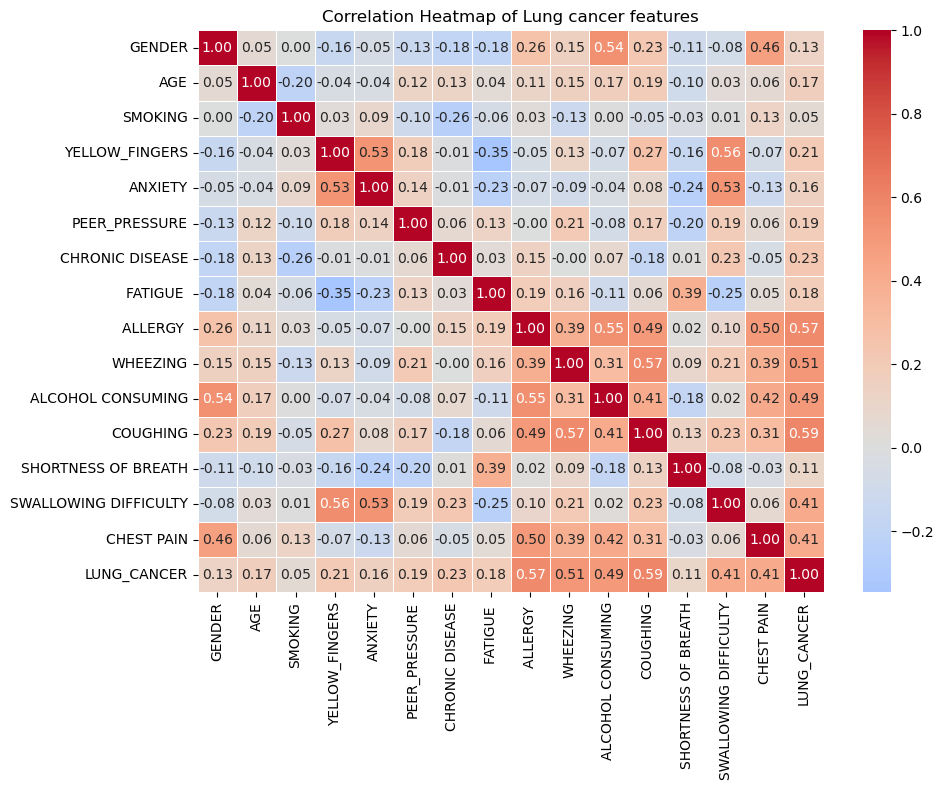

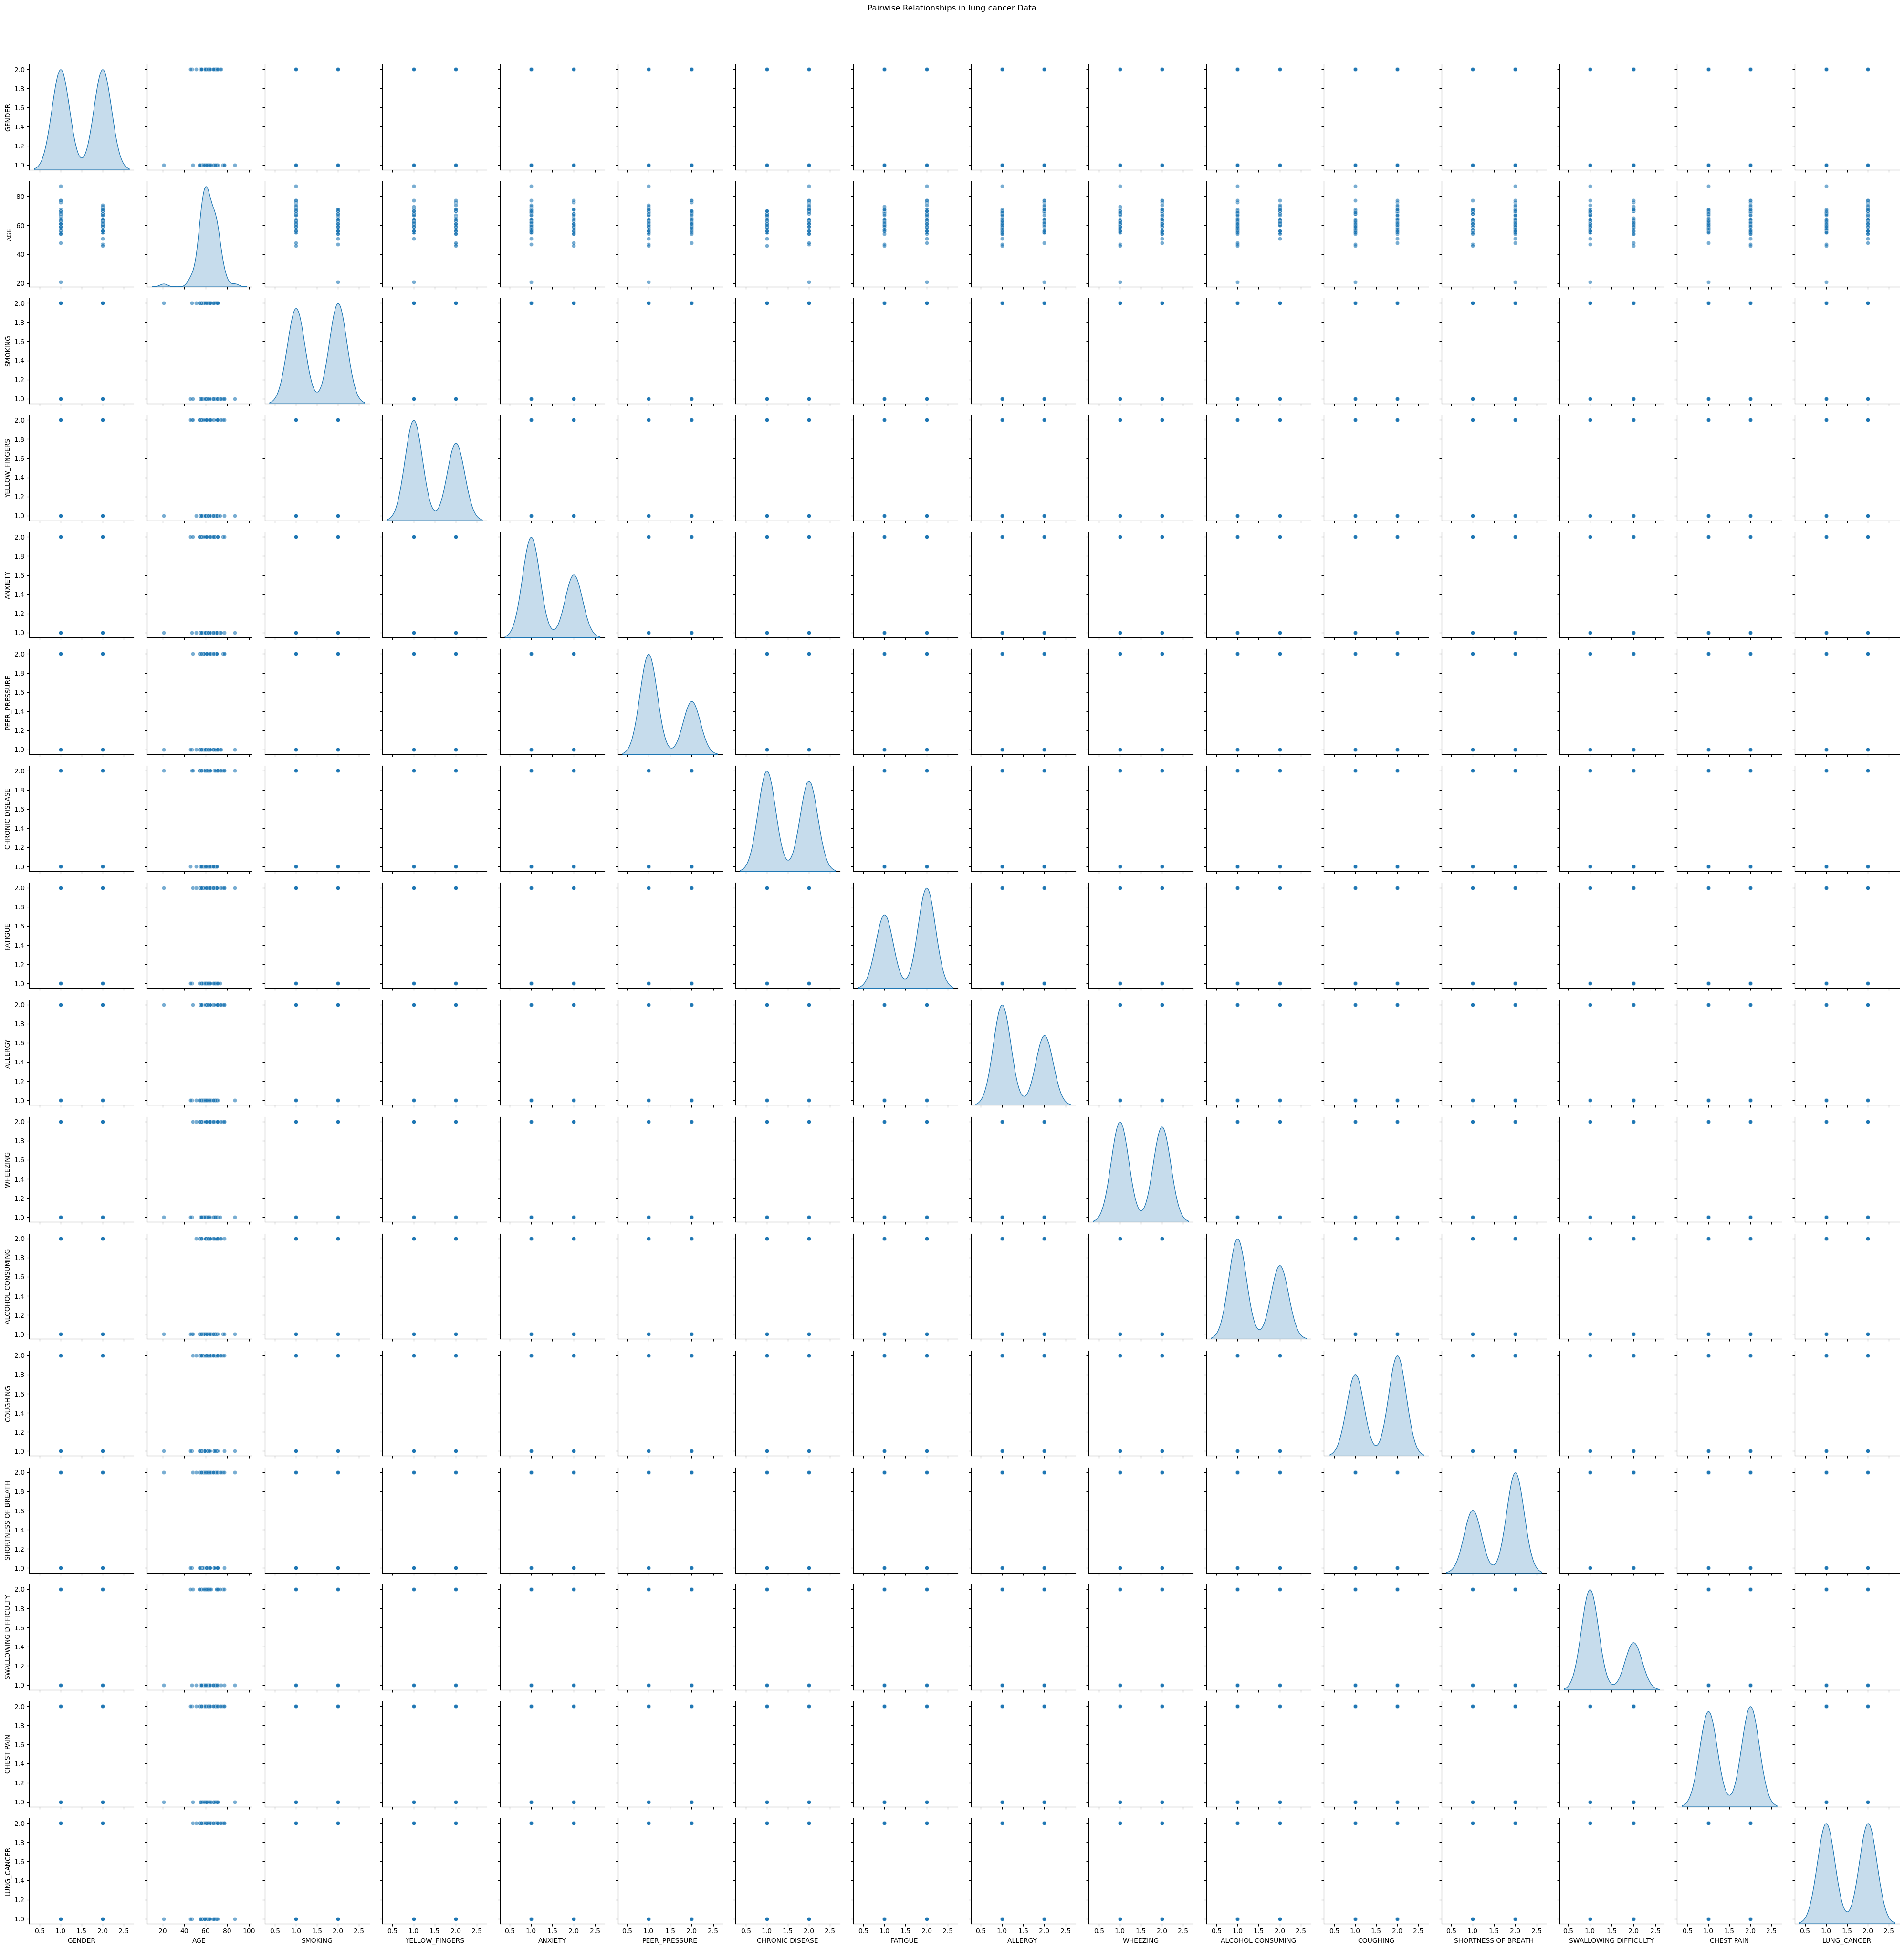

          GENDER        AGE    SMOKING  YELLOW_FINGERS    ANXIETY  \
count  78.000000  78.000000  78.000000       78.000000  78.000000   
mean    1.500000  62.243590   1.512821        1.435897   1.384615   
std     0.503236   8.764133   0.503071        0.499083   0.489653   
min     1.000000  21.000000   1.000000        1.000000   1.000000   
25%     1.000000  57.000000   1.000000        1.000000   1.000000   
50%     1.500000  62.000000   2.000000        1.000000   1.000000   
75%     2.000000  68.750000   2.000000        2.000000   2.000000   
max     2.000000  87.000000   2.000000        2.000000   2.000000   

       PEER_PRESSURE  CHRONIC DISEASE   FATIGUE    ALLERGY    WHEEZING  \
count      78.000000        78.000000  78.000000  78.000000  78.000000   
mean        1.346154         1.474359   1.576923   1.410256   1.487179   
std         0.478822         0.502574   0.497245   0.495064   0.503071   
min         1.000000         1.000000   1.000000   1.000000   1.000000   
25%     

In [168]:
# Heatmap 
corr = df_d.corr(numeric_only=True)  # ensure we only have numeric data

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,  
            fmt='.2f',  
            linewidths=.5)
plt.title('Correlation Heatmap of Lung cancer features')
plt.tight_layout()
plt.show()

# pairplot
sns.pairplot(df_d, 
             diag_kind='kde',  
             plot_kws={'alpha': 0.6}, 
             corner=False) 
plt.suptitle('Pairwise Relationships in lung cancer Data', y=1.02)
plt.tight_layout()
plt.show()

# shows important stats about each feature
print(df_d.describe(include='all'))

## Univariate analysis

In [94]:
# List of all categorical features (everything except AGE)
categorical_features = [
    'GENDER', 
    'SMOKING', 
    'YELLOW_FINGERS', 
    'ANXIETY', 
    'PEER_PRESSURE', 
    'CHRONIC DISEASE', 
    'FATIGUE ', 
    'ALLERGY ', 
    'WHEEZING', 
    'ALCOHOL CONSUMING', 
    'COUGHING', 
    'SHORTNESS OF BREATH', 
    'SWALLOWING DIFFICULTY', 
    'CHEST PAIN', 
    'LUNG_CANCER'
]

# List of numerical features (only AGE in this case)
numerical_features = ['AGE']

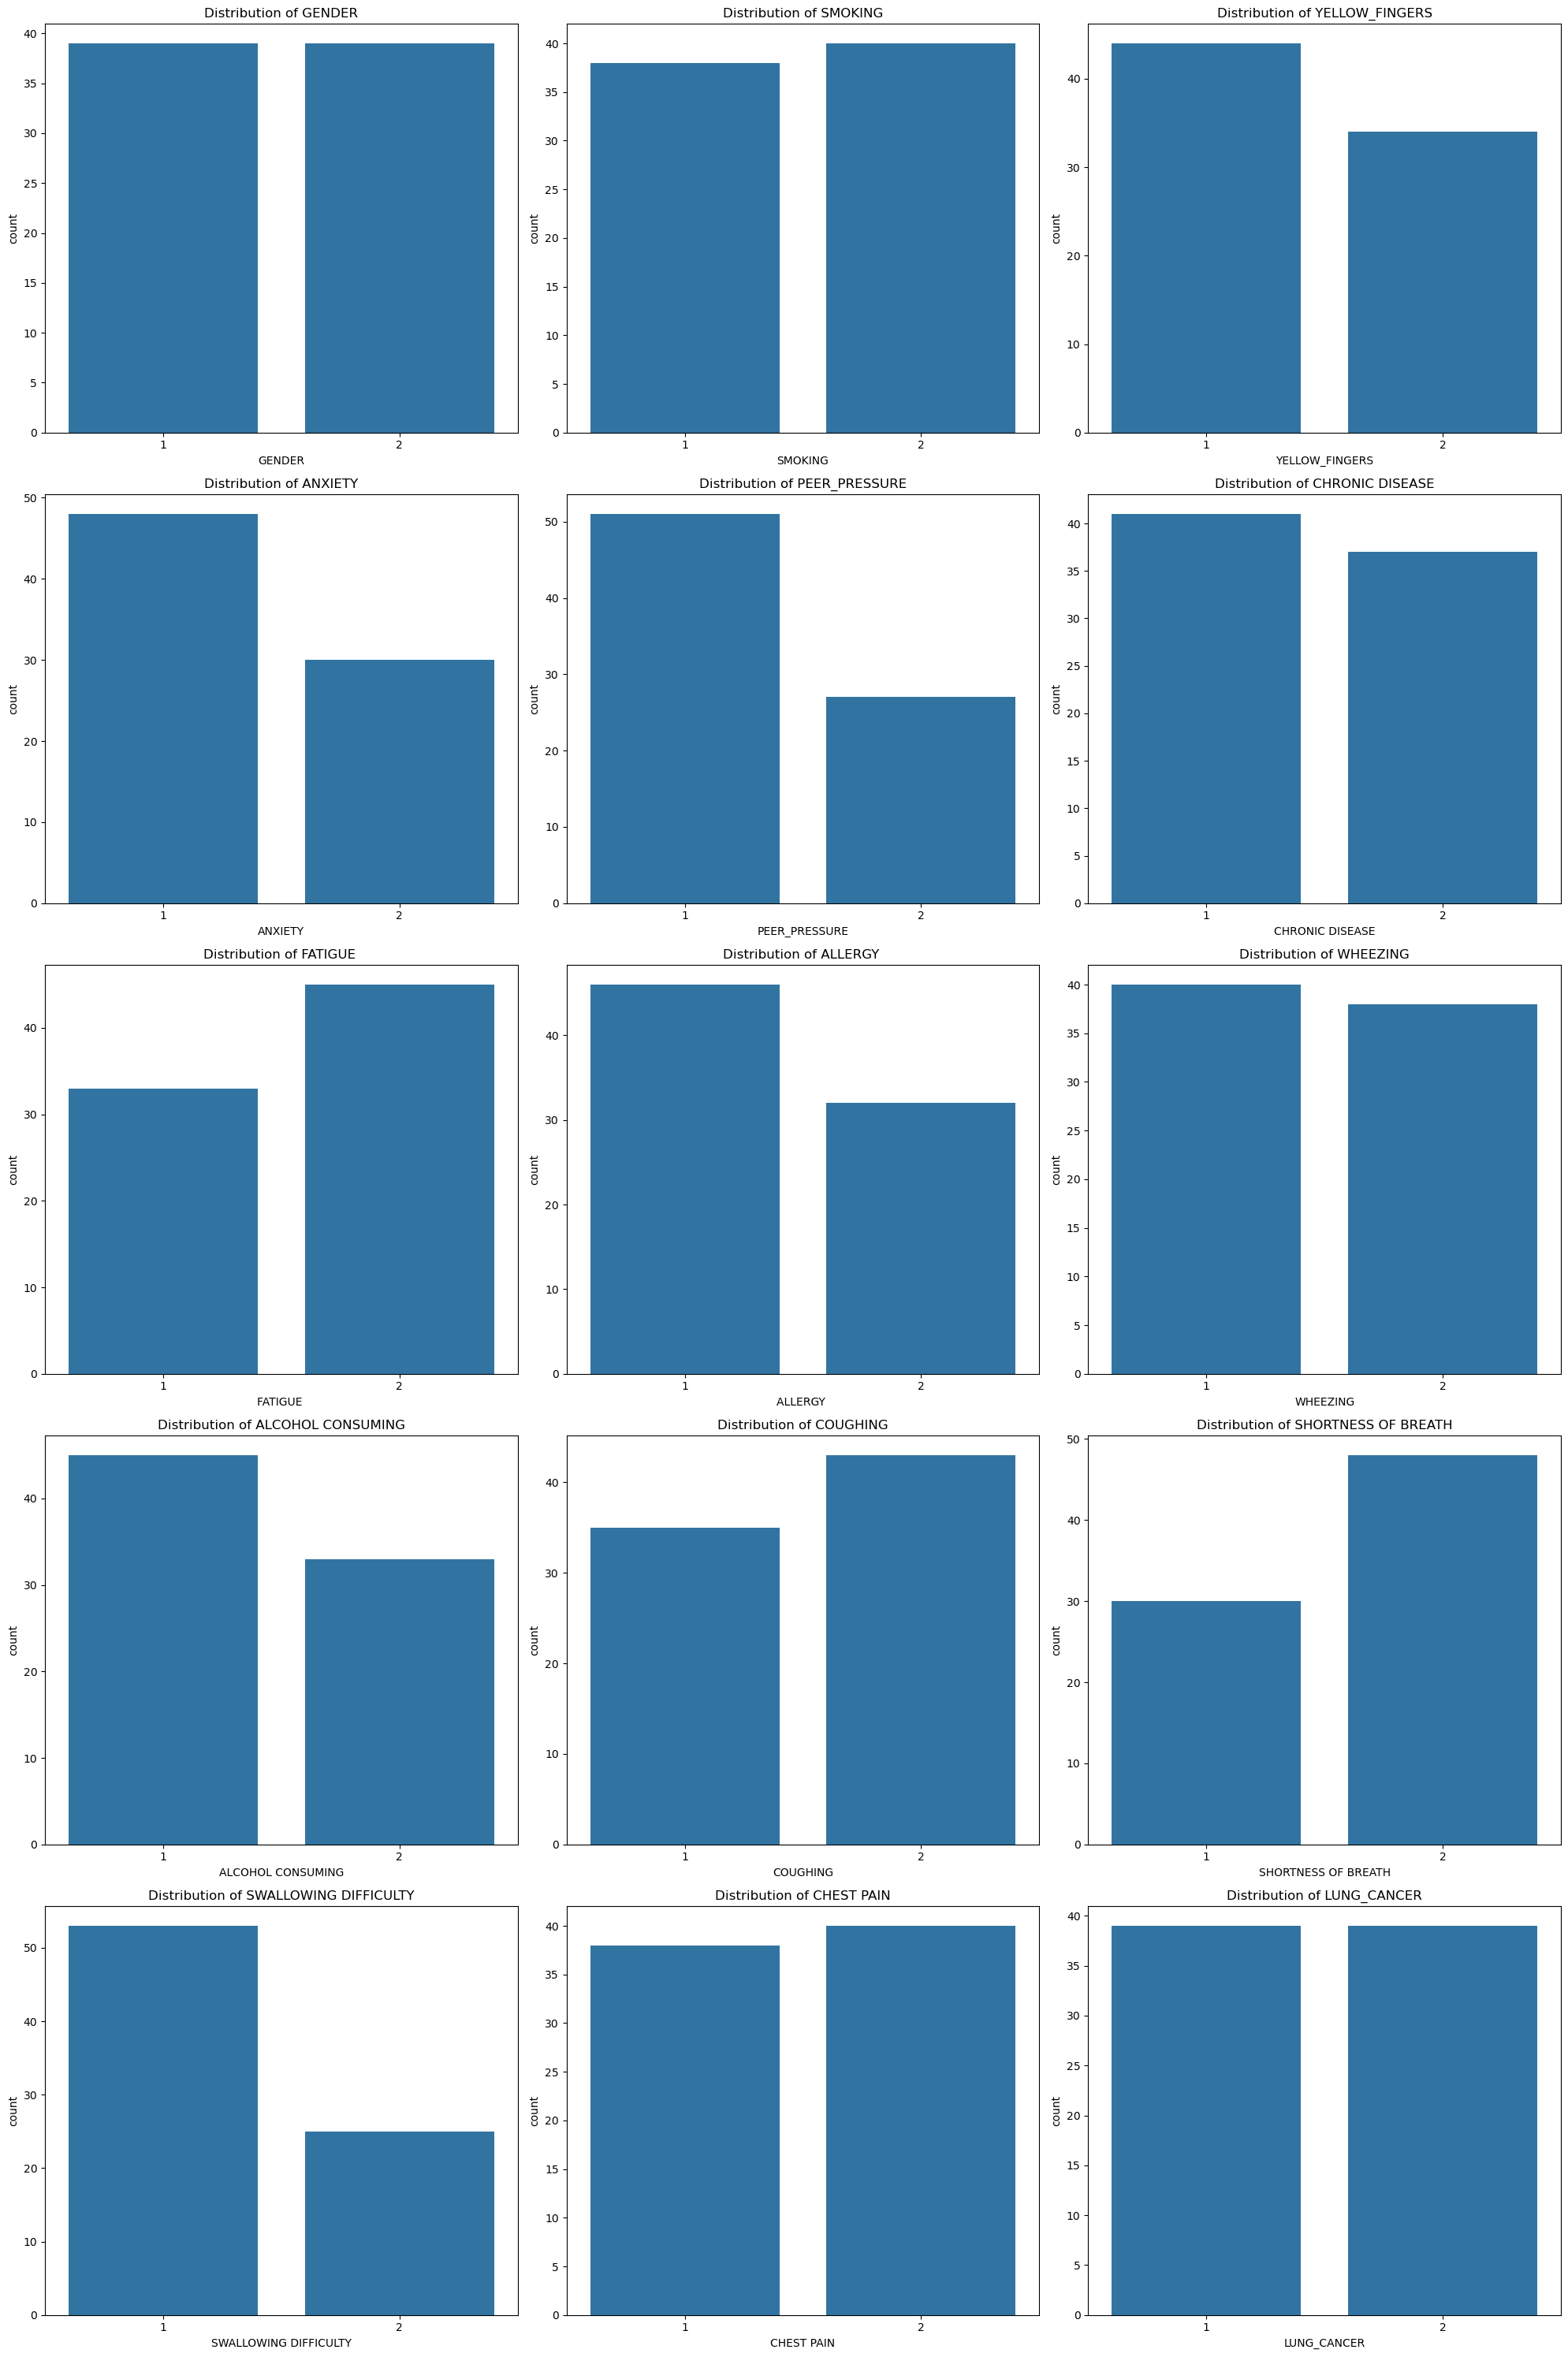

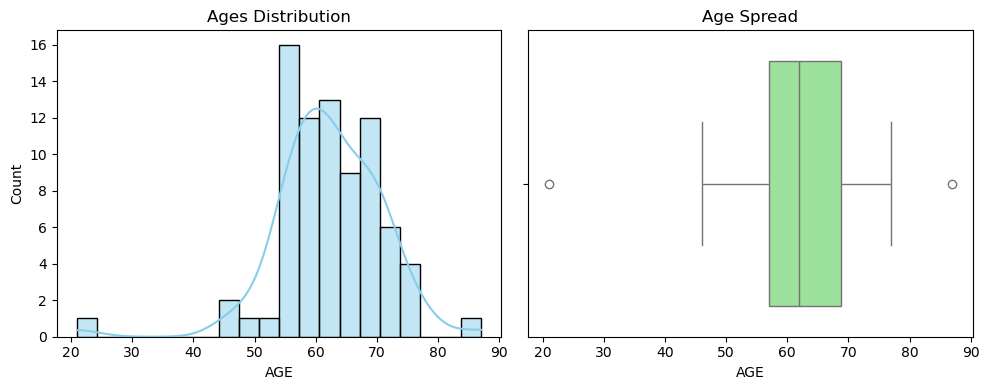

<Figure size 640x480 with 0 Axes>

In [95]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, data=df_d)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# For the numerical feature (AGE)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_d['AGE'], kde=True, bins=20, color='skyblue')
plt.title('Ages Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_d['AGE'], color='lightgreen')
plt.title('Age Spread')
plt.tight_layout()
plt.show()

plt.tight_layout()  # Prevent label overlap
plt.show()

## Bivariate analysis

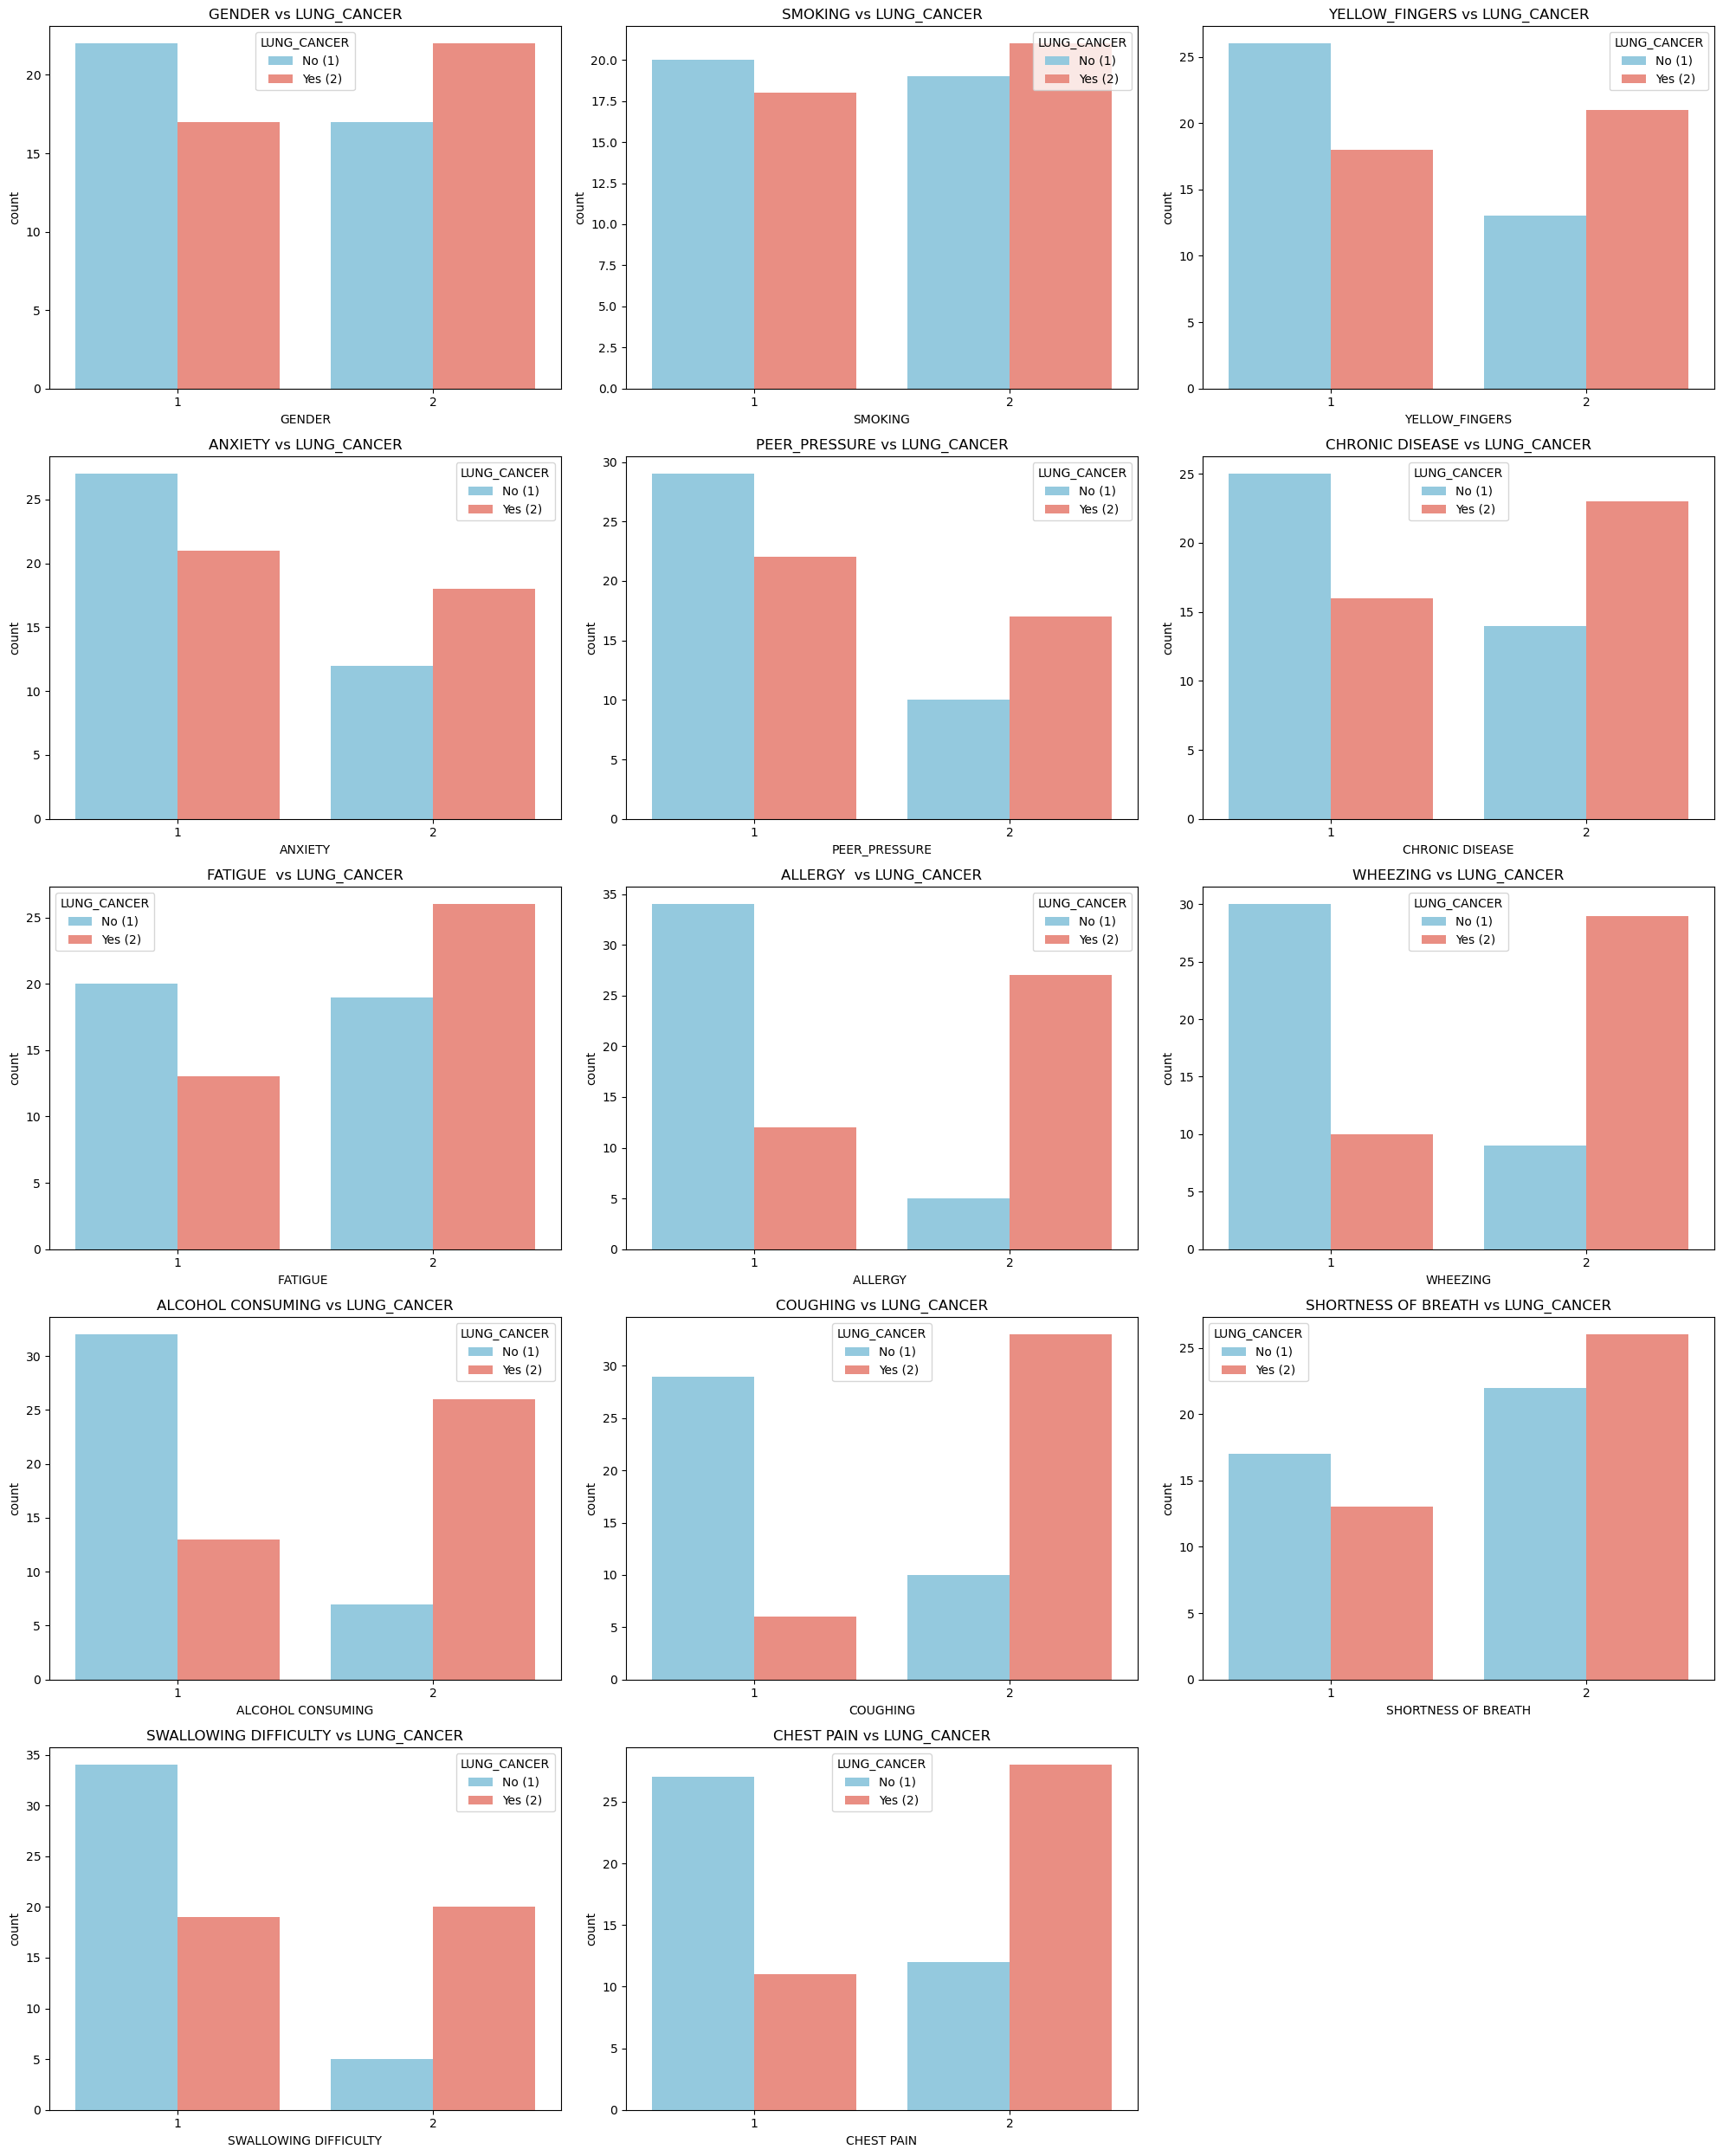

In [100]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(categorical_features, 1):
    if feature != 'LUNG_CANCER':  # Skip the target itself
        plt.subplot(5, 3, i)
        sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
        plt.title(f'{feature} vs LUNG_CANCER')
        plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
plt.tight_layout()
plt.show()

C:\Users\Sven\AppData\Local\Temp\ipykernel_6616\1242225853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_d, palette={"1": 'lightgreen', "2": 'orange'})


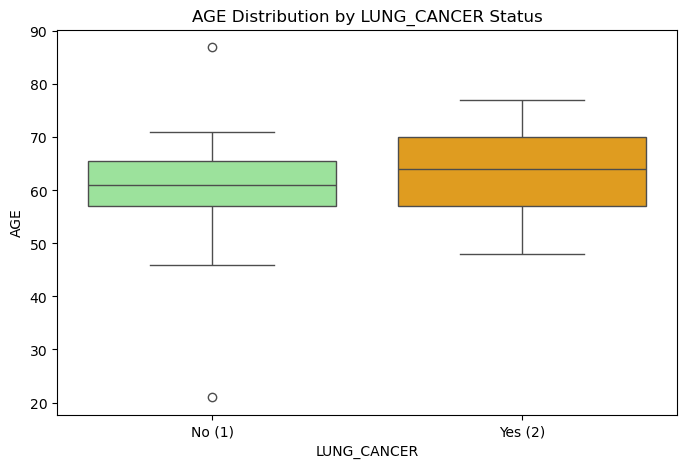

In [102]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_d, palette={"1": 'lightgreen', "2": 'orange'})
plt.title('AGE Distribution by LUNG_CANCER Status')
plt.xticks(ticks=[0, 1], labels=['No (1)', 'Yes (2)'])
plt.show()

In [310]:
carcinogens = ['SMOKING', 'ALCOHOL CONSUMING']
contributing = ['YELLOW_FINGERS', 'ANXIETY', "PEER_PRESSURE"]
symptoms = ['CHEST PAIN', 'SWALLOWING DIFFICULTY', 'COUGHING', 'WHEEZING', 'SHORTNESS OF BREATH', 'FATIGUE ' ]
symptom_links = ['CHRONIC DISEASE', 'ALLERGY ']
demographs  = ['AGE', 'GENDER']

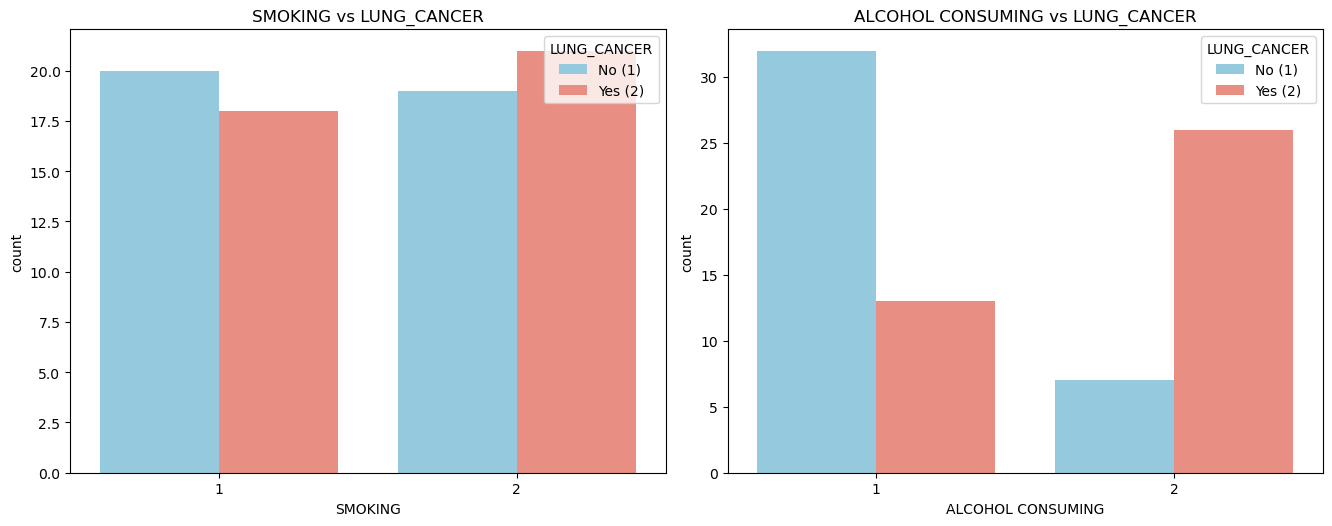

In [174]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(carcinogens, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
    plt.title(f'{feature} vs LUNG_CANCER')
    plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
plt.tight_layout()
plt.show()

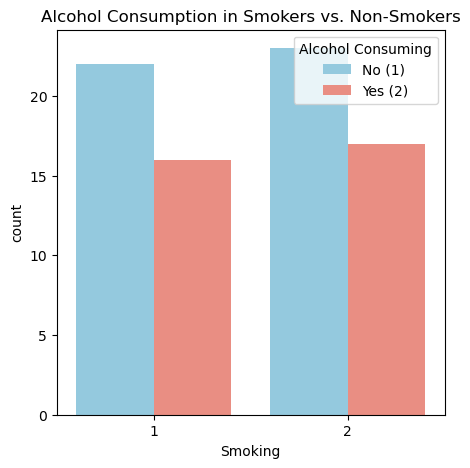

In [202]:
plt.figure(figsize=(5, 5))
sns.countplot(x='SMOKING', hue='ALCOHOL CONSUMING', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
plt.title('Alcohol Consumption in Smokers vs. Non-Smokers')
plt.xlabel('Smoking')
plt.legend(title='Alcohol Consuming', labels=['No (1)', 'Yes (2)'])
plt.show()

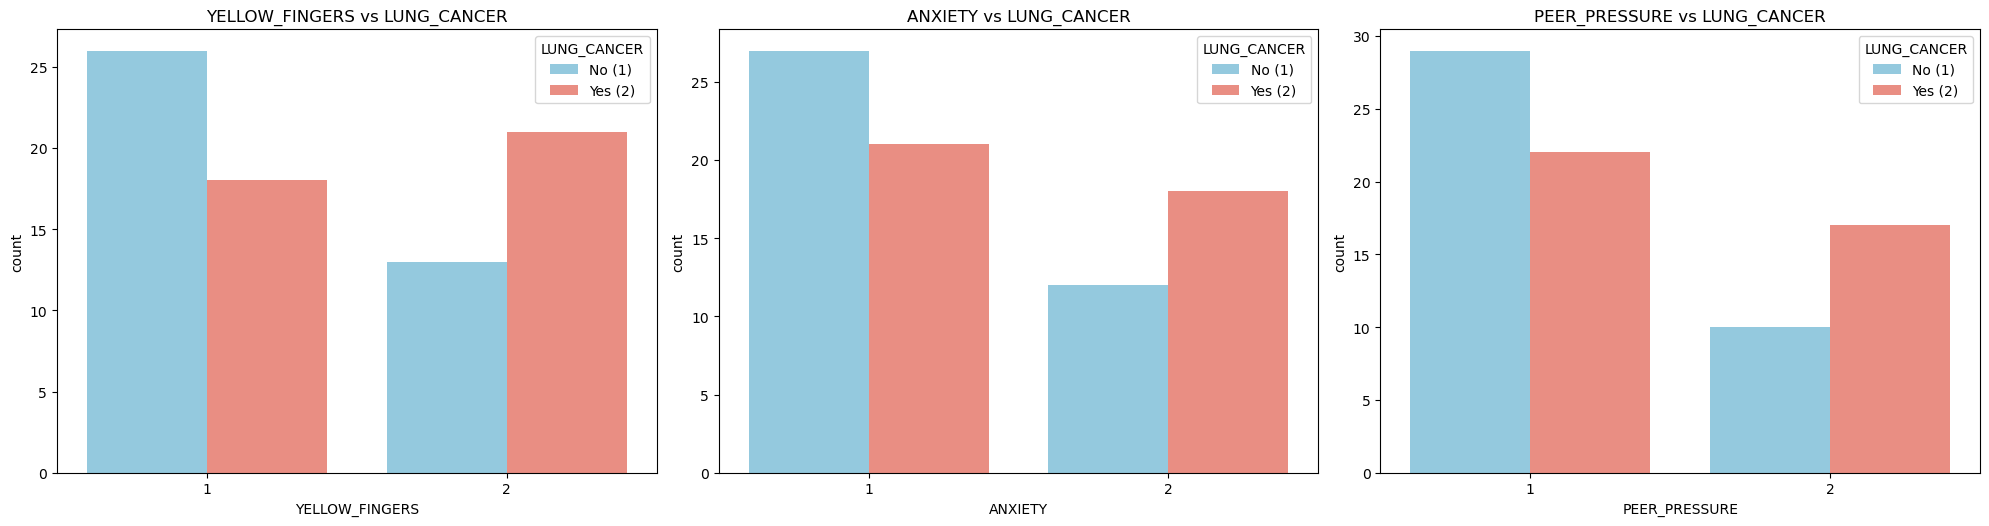

In [176]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(contributin, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
    plt.title(f'{feature} vs LUNG_CANCER')
    plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
plt.tight_layout()
plt.show()

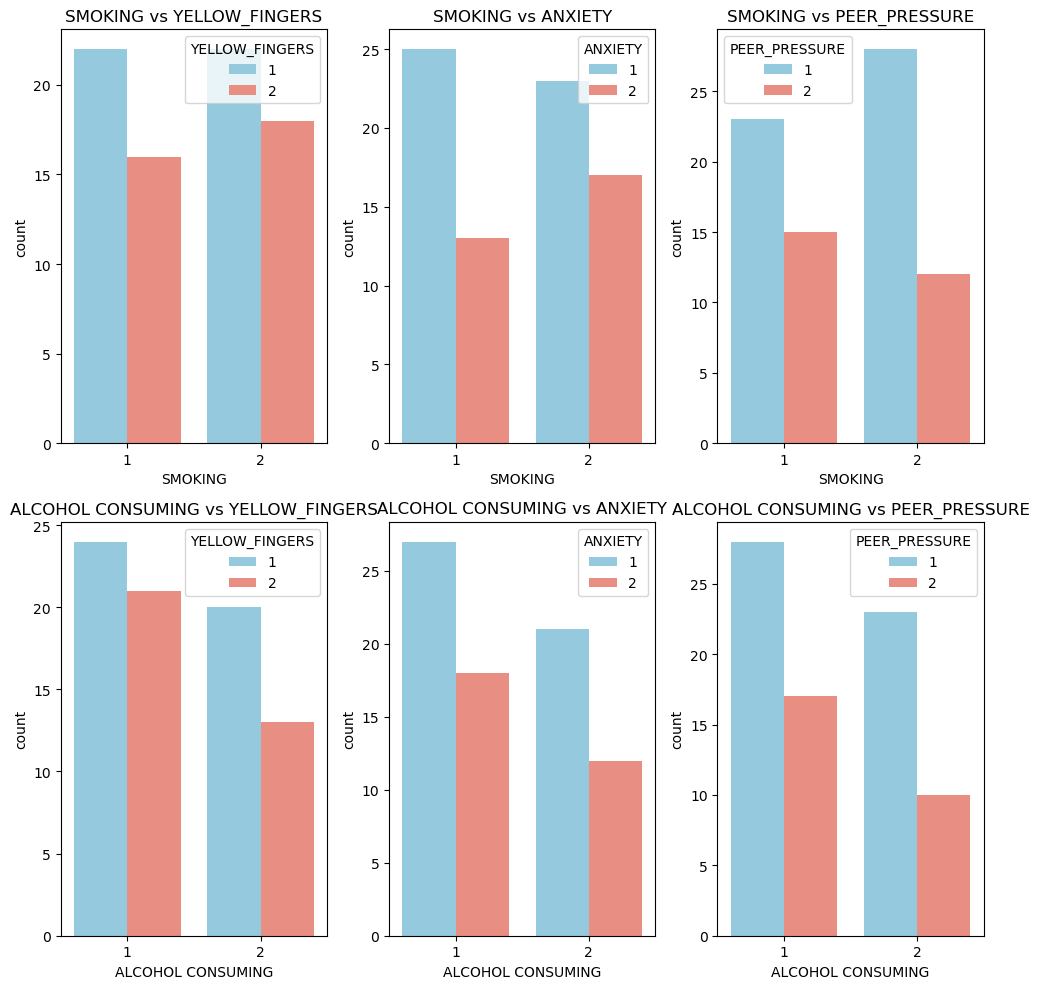

In [186]:
plt.figure(figsize=(10, 10))
plot_num = 1 

for carcinogen in carcinogens:
    for feature in contributing:
        plt.subplot(len(carcinogens), len(contributing), plot_num)
        sns.countplot(x=carcinogen, hue=feature, data=df_d, palette={1: 'skyblue', 2: 'salmon'})
        plt.title(f'{carcinogen} vs {feature}')
        plt.legend(title=feature)
        plot_num += 1

plt.tight_layout()
plt.show()

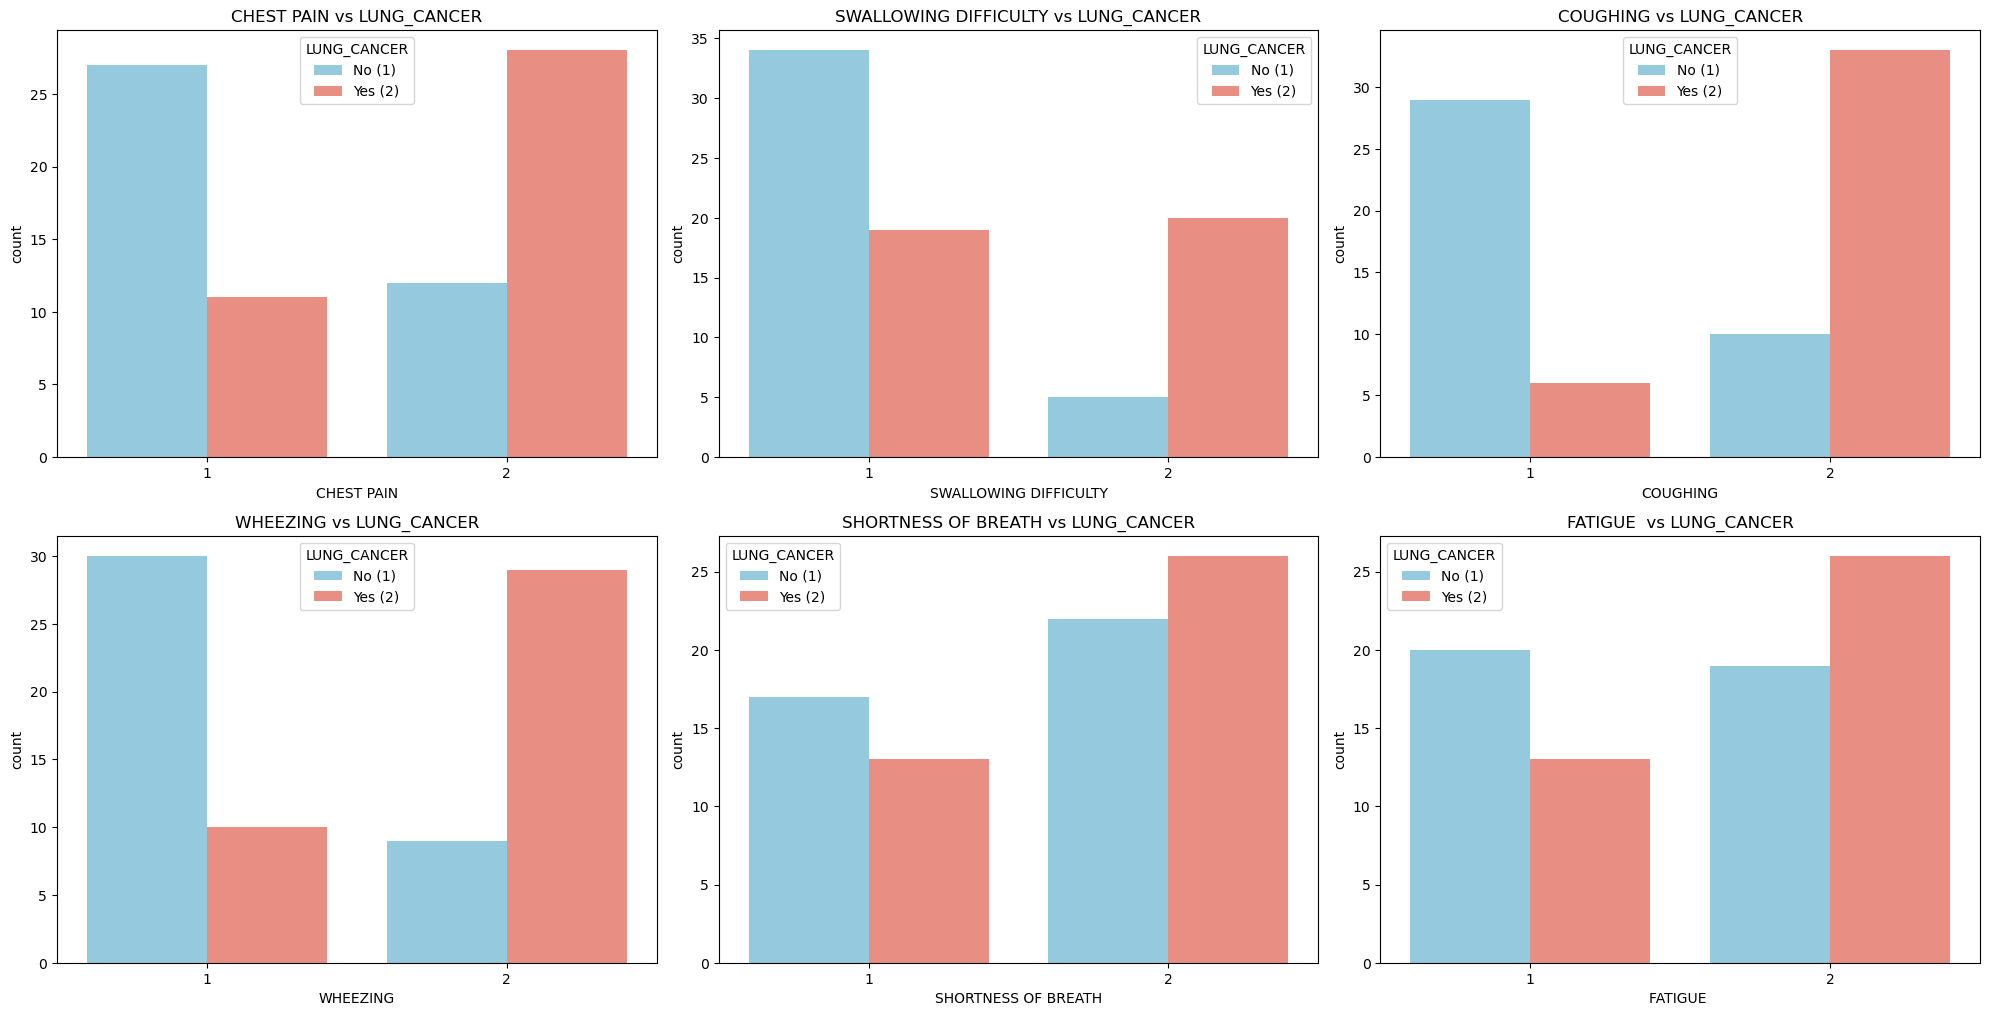

In [236]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(symptoms, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
    plt.title(f'{feature} vs LUNG_CANCER')
    plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
plt.tight_layout()
plt.show()

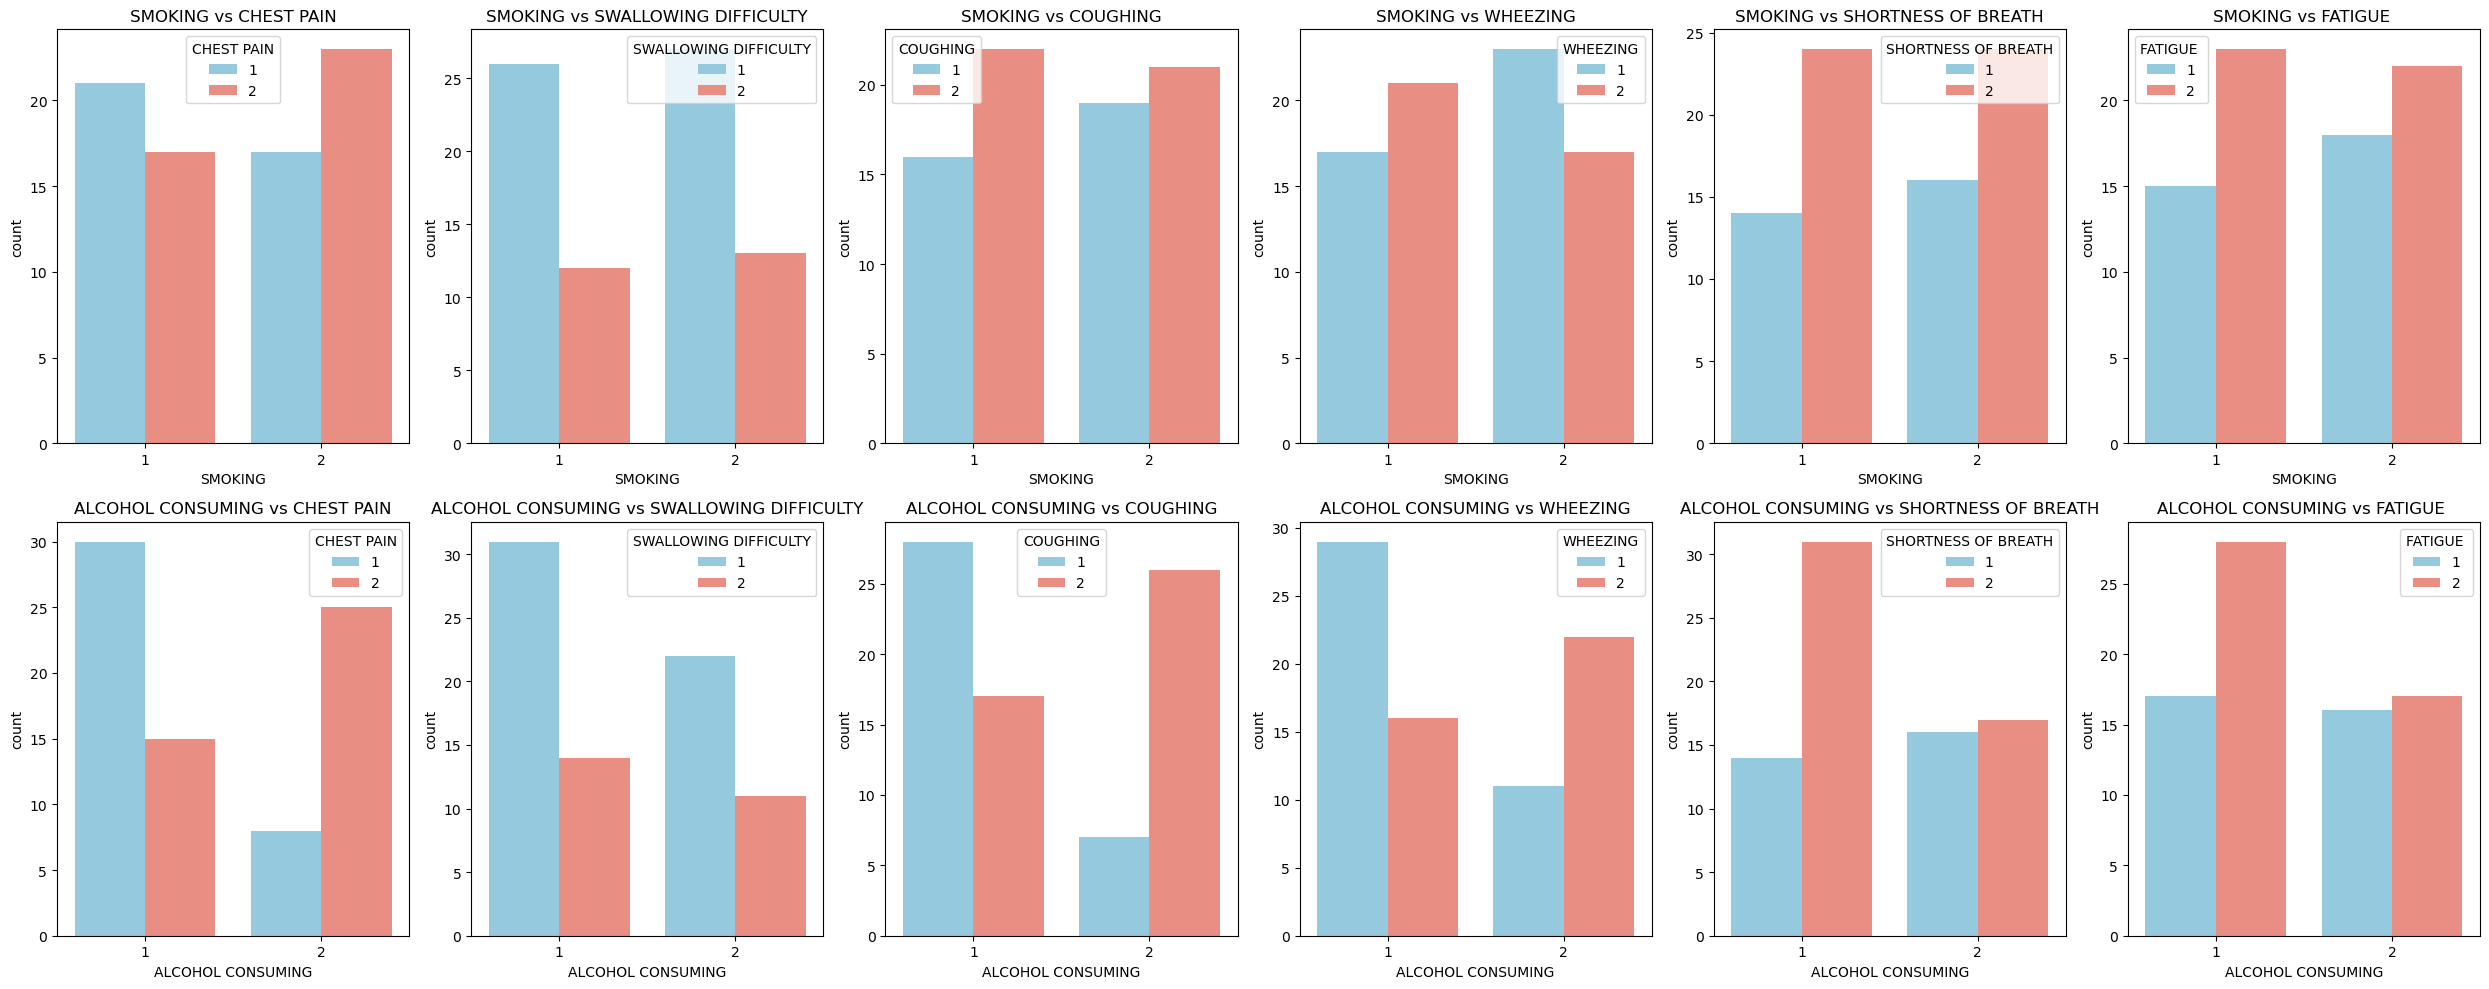

In [234]:
plt.figure(figsize=(25, 10))
plot_num = 1 

for carcinogen in carcinogens:
    for feature in symptoms:
        plt.subplot(len(carcinogens), len(symptoms), plot_num)
        sns.countplot(x=carcinogen, hue=feature, data=df_d, palette={1: 'skyblue', 2: 'salmon'})
        plt.title(f'{carcinogen} vs {feature}')
        plt.legend(title=feature)
        plot_num += 1

plt.tight_layout()
plt.show()

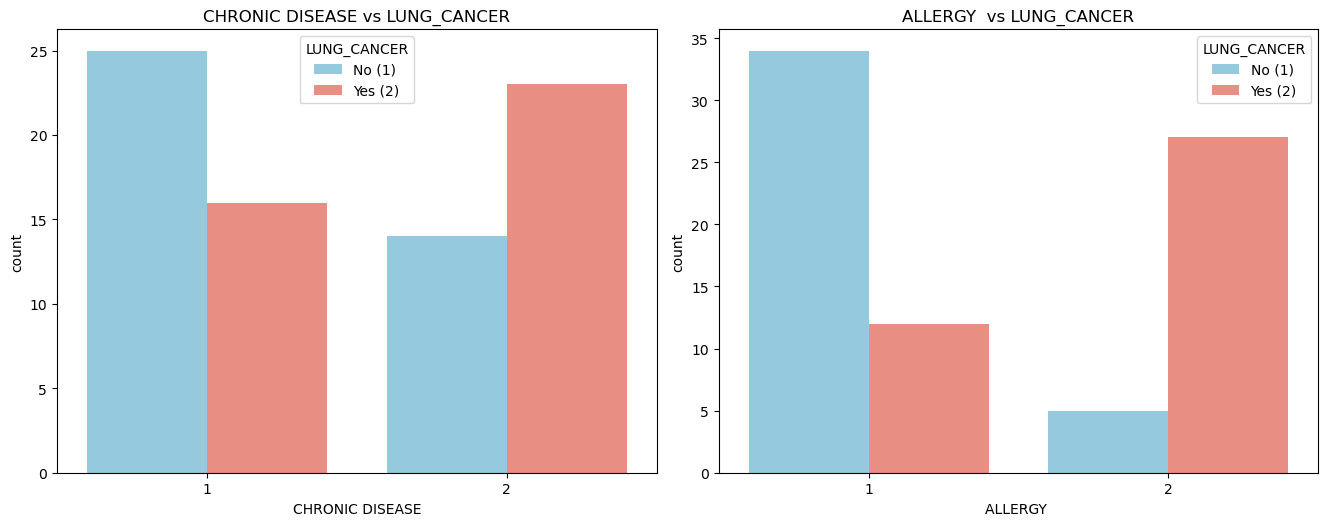

In [262]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(symptom_links, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, palette={1: 'skyblue', 2: 'salmon'})
    plt.title(f'{feature} vs LUNG_CANCER')
    plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
plt.tight_layout()
plt.show()

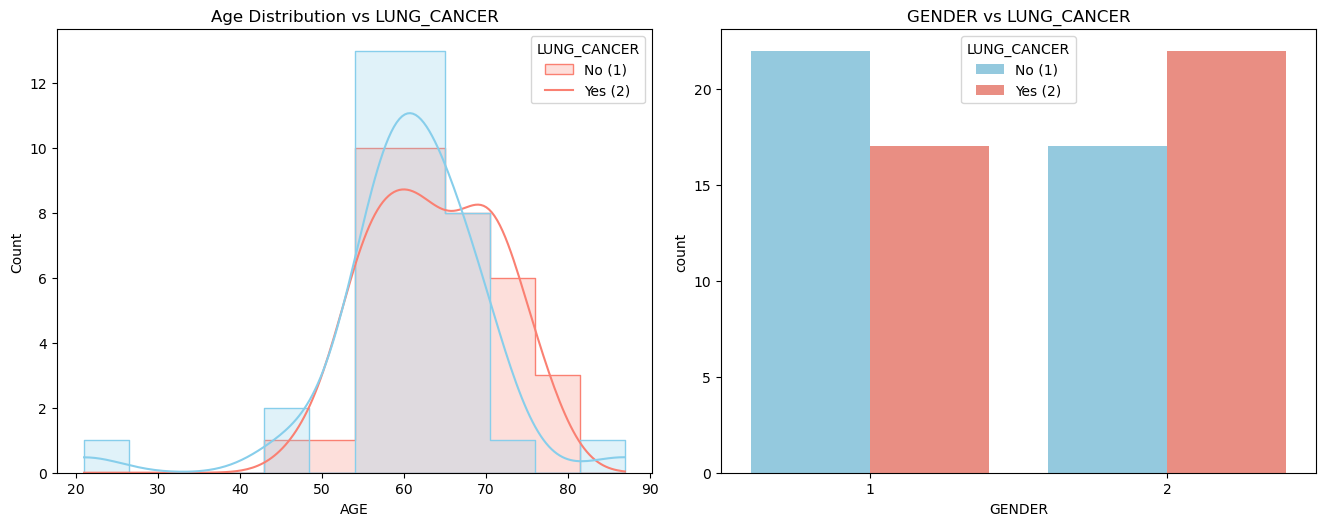

In [314]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(demographs, 1):
    plt.subplot(5, 3, i)
    
    if feature == 'AGE':
        sns.histplot(data=df_d, x='AGE', hue='LUNG_CANCER', 
                     element='step', kde=True, 
                     palette={1: 'skyblue', 2: 'salmon'})
        plt.title(f'Age Distribution vs LUNG_CANCER')
    else:
        sns.countplot(x=feature, hue='LUNG_CANCER', data=df_d, 
                     palette={1: 'skyblue', 2: 'salmon'})
        plt.title(f'{feature} vs LUNG_CANCER')
    
    plt.legend(title='LUNG_CANCER', labels=['No (1)', 'Yes (2)'])
    
plt.tight_layout()
plt.show()

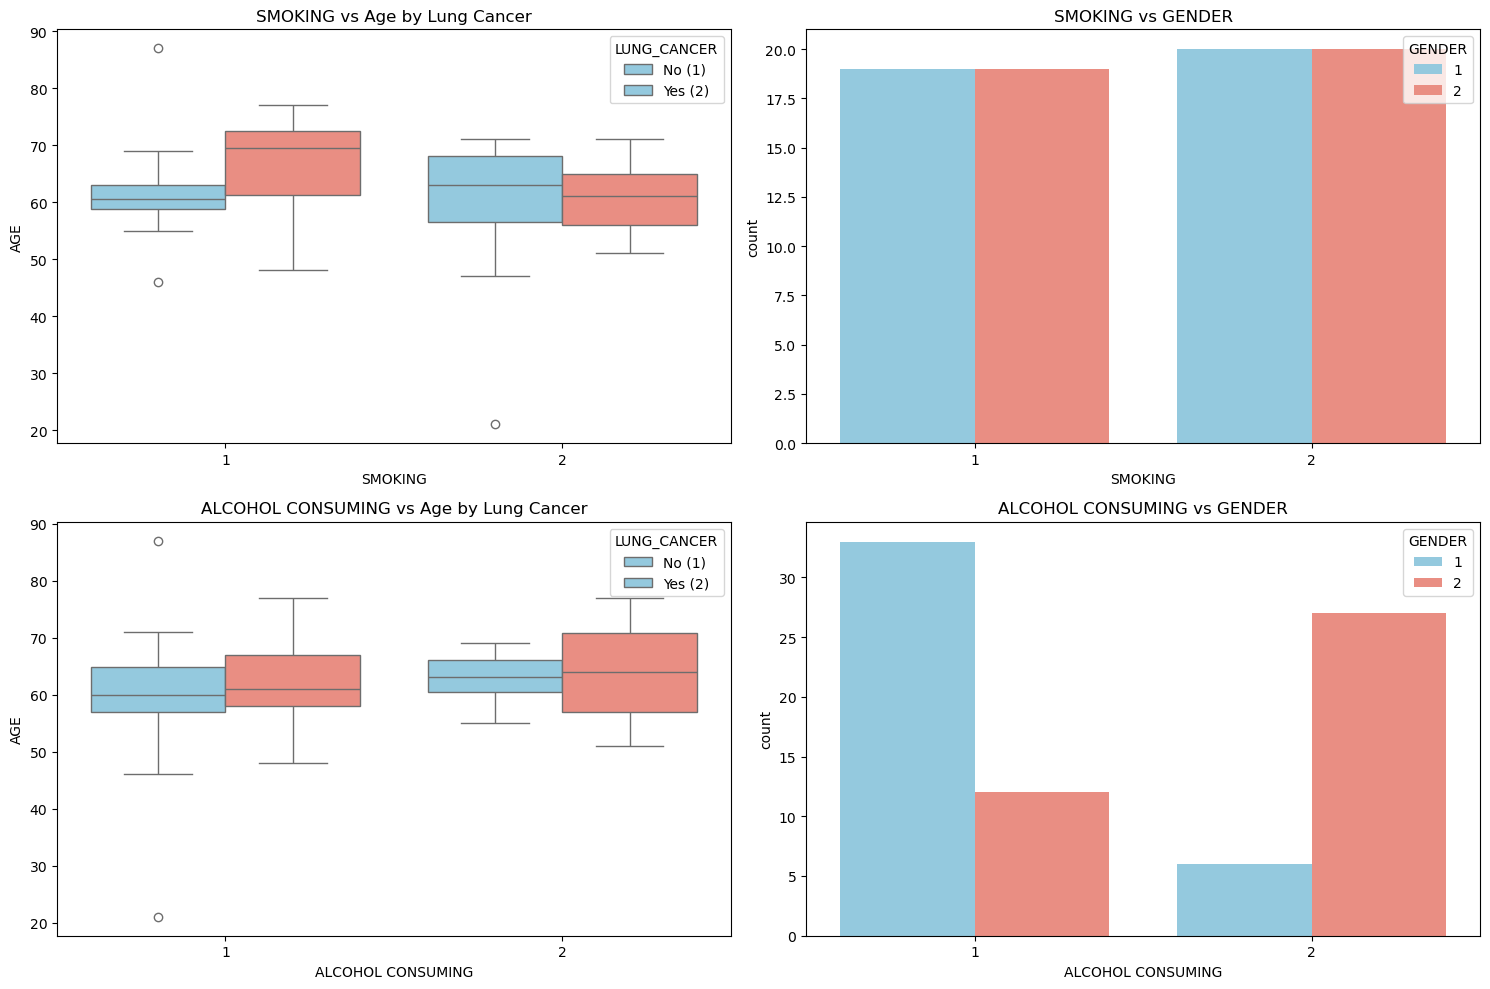

In [324]:
plt.figure(figsize=(15, 10))
plot_num = 1

for carcinogen in carcinogens:
    for demo in demographs:
        plt.subplot(len(carcinogens), len(demographs), plot_num)
        
        if demo == 'AGE':
            sns.boxplot(x=carcinogen, y='AGE', hue='LUNG_CANCER', data=df_d,
                       palette={1: 'skyblue', 2: 'salmon'})
            plt.title(f'{carcinogen} vs Age by Lung Cancer')
        else:
            sns.countplot(x=carcinogen, hue=demo, data=df_d, 
                        palette={1: 'skyblue', 2: 'salmon'})
            plt.title(f'{carcinogen} vs {demo}')
        
        plt.legend(title='LUNG_CANCER' if demo == 'AGE' else demo,
                  labels=['No (1)', 'Yes (2)'] if demo == 'AGE' else None)
        plot_num += 1

plt.tight_layout()
plt.show()

C:\Users\Sven\AppData\Local\Temp\ipykernel_6616\1686386414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SHORTNESS OF BREATH', y='AGE', data=df_d,
C:\Users\Sven\AppData\Local\Temp\ipykernel_6616\1686386414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FATIGUE ', y='AGE', data=df_d,


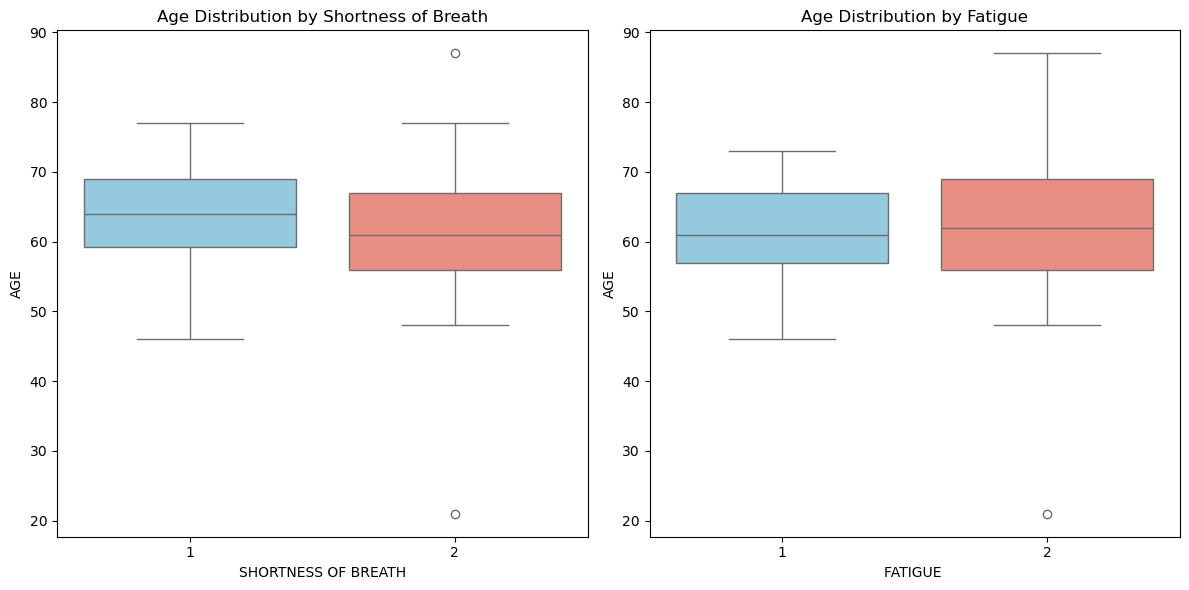

In [332]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='SHORTNESS OF BREATH', y='AGE', data=df_d, 
             palette={"1": 'skyblue', "2": 'salmon'})
plt.title('Age Distribution by Shortness of Breath')

plt.subplot(1, 2, 2)
sns.boxplot(x='FATIGUE ', y='AGE', data=df_d,
           palette={"1": 'skyblue', "2": 'salmon'})
plt.title('Age Distribution by Fatigue')

plt.tight_layout()
plt.show()

## Feature Selection

In [464]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np

X = df[['SMOKING', 'ALCOHOL CONSUMING', 'YELLOW_FINGERS', 'ANXIETY', "PEER_PRESSURE", 'CHEST PAIN',
        'SWALLOWING DIFFICULTY', 'COUGHING', 'WHEEZING', 'SHORTNESS OF BREATH', 'FATIGUE ',
        'CHRONIC DISEASE', 'ALLERGY ', 'AGE', 'GENDER']]

y = df["LUNG_CANCER"].replace({1: 0, 2: 1})  # 0 = No, 1 = Yes

X_scaled = StandardScaler().fit_transform(X)

X_scaled = sm.add_constant(X_scaled)

class_counts = y.value_counts()
weights = y.map({0: class_counts[1] / class_counts[0], 1: 1.0}) 

logit_model = sm.Logit(y, X_scaled)
result = logit_model.fit(weights=weights)

print(result.summary())
print("\nFeature p-values:\n", result.pvalues[1:]) 



ValueError: could not convert string to float: 'M'

## SMOTE

In [418]:

selected_features = ['SMOKING', 'PEER_PRESSURE', 'SWALLOWING DIFFICULTY', 
                    'COUGHING', 'FATIGUE ', 'CHRONIC DISEASE', 'ALLERGY ', 'LUNG_CANCER']

df_s = df[selected_features].copy()
# 1. Split FIRST (before any resampling)
X = df_s.drop('LUNG_CANCER', axis=1)
y = df_s['LUNG_CANCER'].replace({1: 0, 2: 1})  # 0=No, 1=Yes

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Preserve class imbalance in splits
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Model Training


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.98      0.89      0.93        54

    accuracy                           0.89        62
   macro avg       0.76      0.88      0.80        62
weighted avg       0.92      0.89      0.90        62



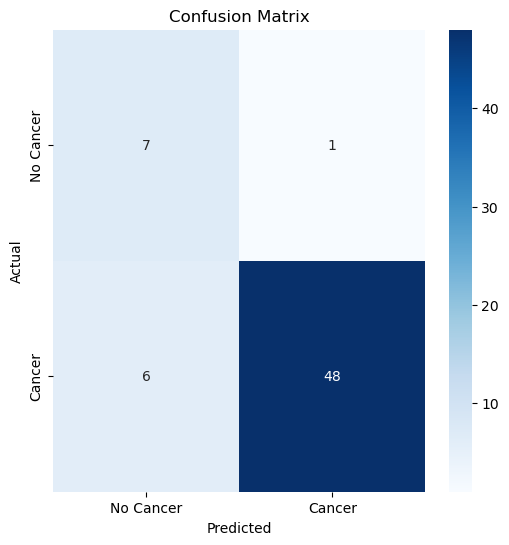

In [442]:
logreg = LogisticRegression(
    random_state=42,
    max_iter=1000,  
    class_weight='balanced'
)

logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancer', 'Cancer'], 
            yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.94      0.87      0.90        54

    accuracy                           0.84        62
   macro avg       0.68      0.75      0.70        62
weighted avg       0.87      0.84      0.85        62



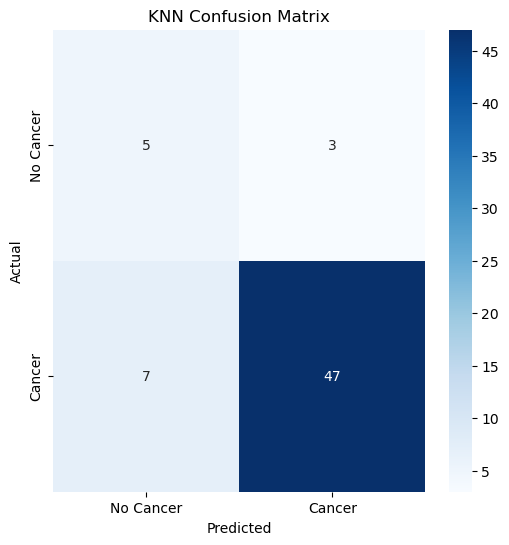

In [444]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='distance',  
    metric='euclidean' 
)

knn.fit(X_train_scaled, y_train_resampled)

y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC AUC

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Cancer', 'Cancer'],
           yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.88      0.47         8
           1       0.97      0.72      0.83        54

    accuracy                           0.74        62
   macro avg       0.65      0.80      0.65        62
weighted avg       0.89      0.74      0.78        62



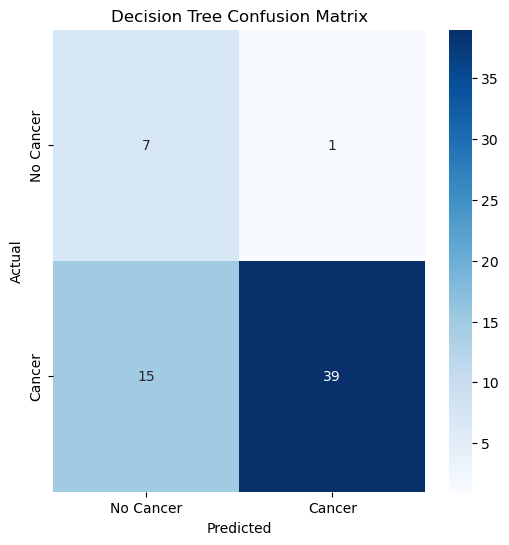

In [450]:
dt = DecisionTreeClassifier(
    max_depth=3,       
    min_samples_split=5, 
    min_samples_leaf=2,  
    random_state=42
)

dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Cancer', 'Cancer'],
           yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.98      0.89      0.93        54

    accuracy                           0.89        62
   macro avg       0.76      0.88      0.80        62
weighted avg       0.92      0.89      0.90        62



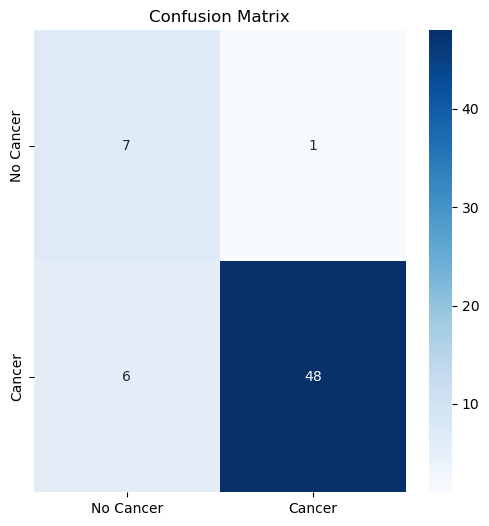

In [458]:
rf = RandomForestClassifier(
    n_estimators=100,   
    max_depth=5,         
    min_samples_split=5, 
    min_samples_leaf=2,    
    random_state=42,
    class_weight='balanced',
    n_jobs=-1          
)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1] 

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.show()
